In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('data.csv').iloc[::-1]

In [3]:
df.drop(['Open', 'High', 'Low'], axis=1, inplace=True)

In [4]:
df.head()

,Date,Close
5912,03-Jan-00,1592.2
5911,04-Jan-00,1638.7
5910,05-Jan-00,1595.8
5909,06-Jan-00,1617.6
5908,07-Jan-00,1613.3


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df_chg= df.set_index(['Date'], drop=True)
df_chg.head()

,Close
Date,
2000-01-03,1592.2
2000-01-04,1638.7
2000-01-05,1595.8
2000-01-06,1617.6
2000-01-07,1613.3


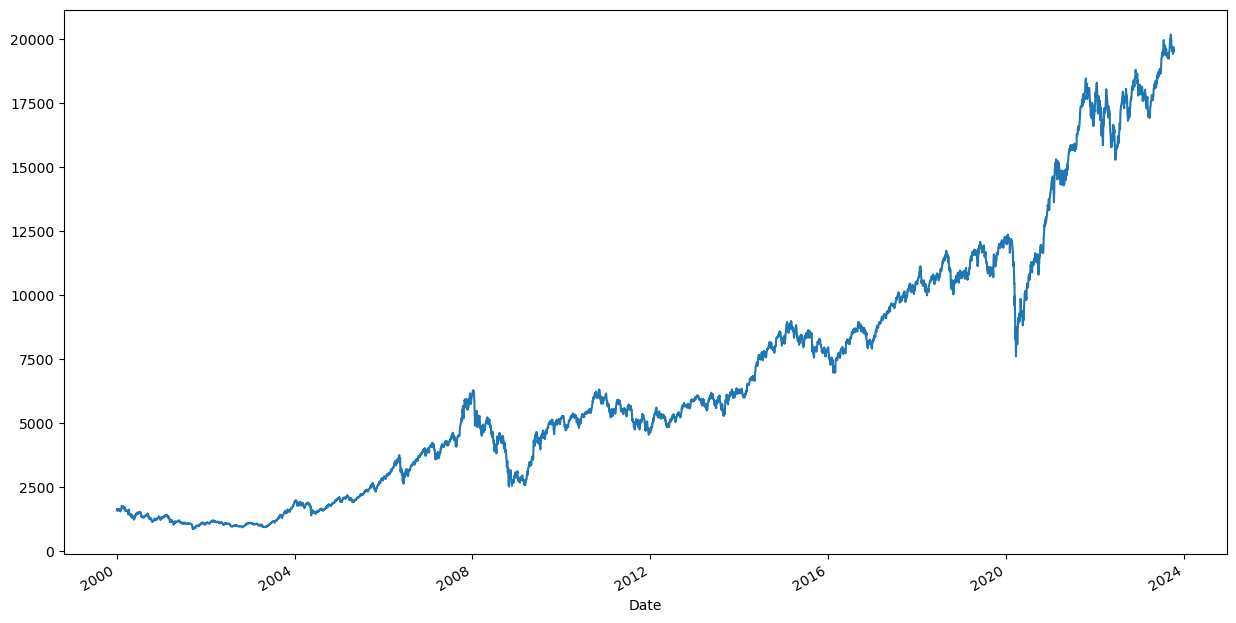

In [6]:
plt.figure(figsize=(15,8))
df_chg['Close'].plot();

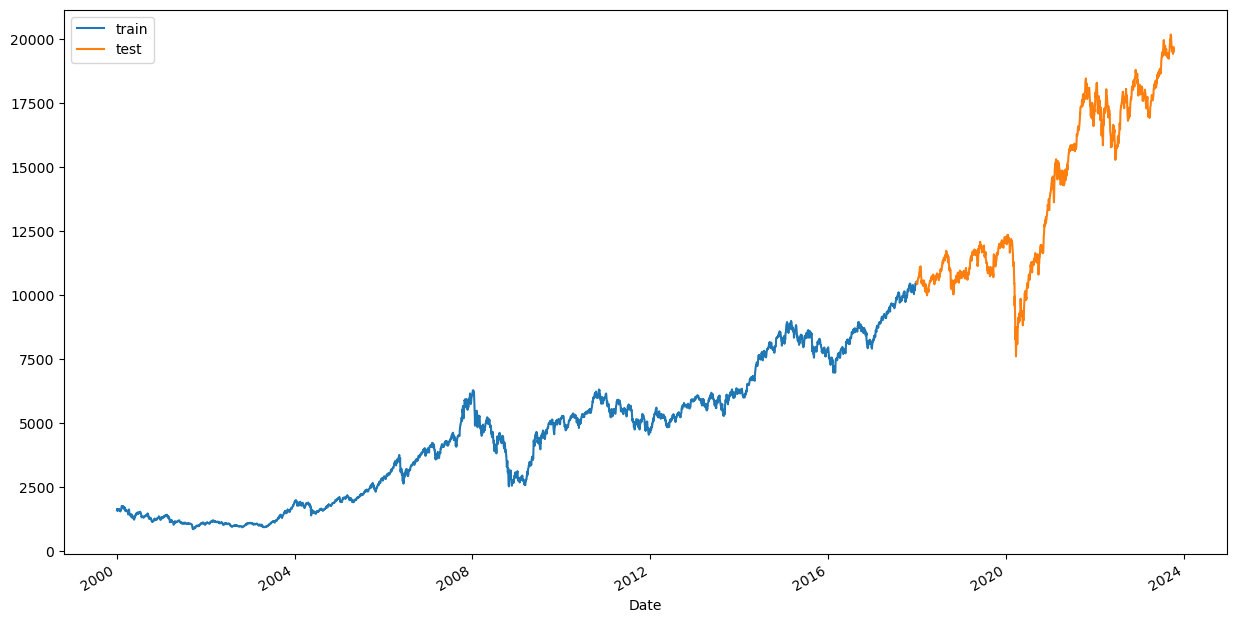

In [7]:
split_date = pd.Timestamp('2017-12-27')
df1 = df_chg['Close']
train = df1.loc[:split_date]
test = df1.loc[split_date:]
plt.figure(figsize=(15,8))
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test']);

In [8]:
print("We have", len(train), "train values")
print("We have", len(test), "test values")

We have 4481 train values
We have 1433 test values


In [9]:
train_processed = df_chg.iloc[:, 0:1].values
train_processed = train_processed[0:4481:1]
test_processed = df_chg.iloc[:, 0:1].values
test_processed = test_processed[4480:5913:1]

In [10]:
scaler = MinMaxScaler(feature_range=(-1, 1))
train_sc = scaler.fit_transform(train_processed)
test_sc = scaler.transform(test_processed)

In [11]:
X_train = train_sc[:-1]
y_train = train_sc[1:]

In [12]:
X_test = test_sc[:-1]
y_test = test_sc[1:]

In [13]:
model = Sequential()
model.add(Dense(12, input_dim=1, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history = model.fit(X_train, y_train, epochs=25, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)

Epoch 1/25
4480/4480 [==============================] - 3s 509us/step - loss: 0.0061
Epoch 2/25
4480/4480 [==============================] - 2s 506us/step - loss: 5.3778e-04
Epoch 3/25
4480/4480 [==============================] - 2s 540us/step - loss: 3.7715e-04
Epoch 4/25
4480/4480 [==============================] - 2s 481us/step - loss: 3.4604e-04
Epoch 5/25
4480/4480 [==============================] - 2s 464us/step - loss: 3.0363e-04
Epoch 6/25
4480/4480 [==============================] - 2s 461us/step - loss: 2.8698e-04
Epoch 7/25
4480/4480 [==============================] - 2s 468us/step - loss: 2.8818e-04
Epoch 8/25
4480/4480 [==============================] - 2s 475us/step - loss: 2.8521e-04
Epoch 9/25
4480/4480 [==============================] - 2s 467us/step - loss: 2.8048e-04
Epoch 10/25
4480/4480 [==============================] - 2s 464us/step - loss: 2.6540e-04
Epoch 11/25
4480/4480 [==============================] - 2s 485us/step - loss: 2.5618e-04
Epoch 12/25
4480/4480 [

In [14]:
y_pred_test = model.predict(X_test)
y_train_pred = model.predict(X_train)

140/140 [==============================] - 0s 415us/step


In [15]:
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test)))

The R2 score on the Train set is:	0.901
The R2 score on the Test set is:	0.735


In [16]:
test_mse = model.evaluate(X_test, y_test, batch_size=1)
print('Mean squared error: %f'%test_mse)

1432/1432 [==============================] - 1s 455us/step - loss: 0.1201
Mean squared error: 0.120124


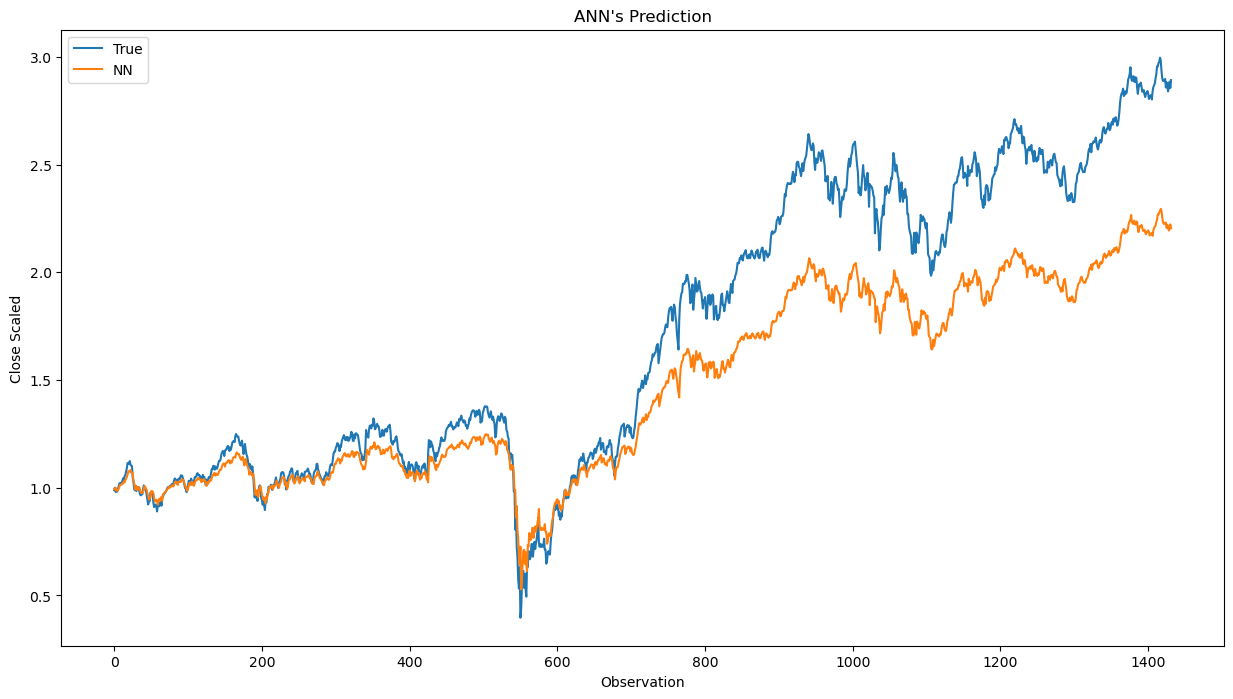

In [17]:
plt.figure(figsize=(15, 8))
plt.plot(y_test, label='True')
plt.plot(y_pred_test, label='NN')
plt.title("ANN's Prediction")
plt.xlabel('Observation')
plt.ylabel('Close Scaled')
plt.legend()
plt.show();